# Série 09 - Exercices - Solutions

Le but de cette série est de se familiariser avec le  module `numpy.random` pour la génération de nombres aléatoires et son application pour les calculs de propagation d'incertitude.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Exercice 1**  - Echantillonner des données

Utiliser la fonction `random.choice` de `numpy` pour tirer 5 valeurs aléatoire avec remise dans le vecteur `data`

In [2]:
data = [1.2, 4., 5.2, 7.3, 8.9, 10.2]

np.random.seed(11029)
np.random.choice(data, 5, replace=True)

array([5.2, 7.3, 5.2, 7.3, 7.3])

**Exercice 2** - Loi de Bernoulli

Soit une variable aléatoire $X$, suivant une loi de Bernoulli :
- prend la valeur 1 avec la probabilité $p$
- prend la valeur 0 avec la probabilité $1-p$

Tirer 15 valeurs aléatoires dans une loi de Bernoulli de probabilité $p=0.35$.

In [3]:
proba = 0.35
np.random.choice([1, 0], 15, p=[proba, 1-proba] )

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1])

**Exercice 3** - Loi Binomiale

Soit une population de 153 individus. Le taux de mortalité est de 0.024.

Faire un tirage aléatoire dans une loi binomiale pour simuler le nombre d'individus qui décèdent.

In [4]:
n = 153
proba = 0.024
np.random.binomial(n, proba)

5

**Exercice 4** - Loi uniforme

Tirer 60 valeurs dans une loi uniforme entre $\pi$ et $2\pi$. En faire l'histogramme.

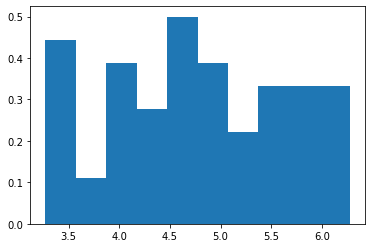

In [5]:
ech_uniform = np.random.uniform( np.pi, 2*np.pi , 60)
plt.hist(ech_uniform, density=True);

**Exercice 5** - Loi normale

Tirer 2'000 valeurs dans une loi gaussienne de moyenne 3.2 et d'écart-type 0.5. Calculer la moyenne et l'écart-type des valeurs tirées pour vérifier que votre tirage est correct.

In [6]:
ech_normal = np.random.normal(3.2, 0.5, 2000)
np.mean(ech_normal)
np.std(ech_normal)

0.5100783368099979

**Exercice 6** - Propagation d'incertitude

Le débit d'eau $Q$ [m$^3$/s]qui traverse une section d'aquifère est égal à :

$$Q = A \times K  \times \frac{h_1-h_0}{L}$$

avec:
- $A$ [m$^2$] l'aire traversée par l'écoulement
- $K$ [m/s] la conductivité hydraulique
- $h_1$ et $h_0$ [m] la charge hydraulique en amont et en aval le long d'une ligne de courant perpendiculaire à la section traversée
- $L$ [m] la distance entre les deux points de mesures

On a mesuré la conductivité hydraulique $K$ sur plusieurs échantillons, ainsi que les facteurs géométriques.

On a obtenu les valeurs suivante avec leur incertitudes

- $A = 500 \pm 5 [m^2]$
- $Y = \ln K = -3 \pm 0.4 [\ln (m/s)] $ 
- $h_1 = 7m \pm 0.2$
- $h_0 = 0 [m]$ 
- $L = 1000 [m]$

Déterminer la valeur moyenne de $Q$ et son intervalle de confiance à 95%. 

On supposera que toutes les incertitudes ci-dessus sont données avec un intervalle de confiance à 95% et que les erreurs sont gaussiennes autour de la valeur centrale donnée.

Arrondissez les valeurs pour avoir des chiffres significatifs raisonnables.

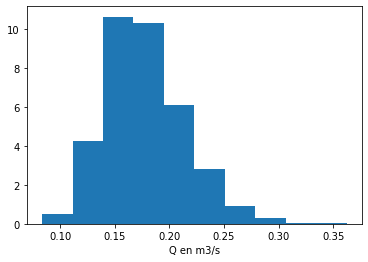

Débit estimée 0.17749129190459365 m3/s
Intervalle de confiance à 95% 0.11791195170739503 - 0.2580857985848611 m3/s


In [7]:
nsimuls = 10000

# Paramètres du problème
A = np.random.normal(500,2.5,nsimuls)
Y = np.random.normal(-3,.2,nsimuls)
K = np.exp(Y)
h1 = np.random.normal(7,.1,nsimuls)
h0 = 0
L = 1000

# Application du calcul
Q = A * K * (h1 - h0) / L

plt.hist(Q, density = True)
plt.xlabel('Q en m3/s')
plt.show()

print("Débit estimée", np.mean(Q),'m3/s')
print("Intervalle de confiance à 95%", np.percentile(Q,2.5),'-',np.percentile(Q,97.5),'m3/s')

Au final on trouve que le **débit est de l'ordre de 0.18 m/s est qu'il est compris (intervalle de confiance à 95%) entre 0.12 et 0.26 m3/s.**